# Exercise 3

## Part A

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import pandas as pd
import stan

import nest_asyncio
nest_asyncio.apply()

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
stan_code = """
data {
  int<lower=0> n;          // Sample size 
  vector[n] X;             // Data
  real<lower=0> sigma;     // Standard deviation for data
  real theta_mean;         // Prior mean for theta
  real<lower=0> theta_std; // Prior standard deviation for theta
}
parameters {
  real theta;              // Unknown mean
}
model {
  theta ~ normal(theta_mean, theta_std); // Prior
  X ~ normal(theta, sigma);              // Likelihood
}
"""

stan_data = {"n": 20,
            'X': np.array( [-0.02, -0.03, 0.82, -1.05, -0.76, 0.46, -0.06, 0.34, -0.08, -0.24, 1.43, 1.07, -2.5 , 1.48, 2.16, 1.23, -0.21, -0.69, 0.73, -0.62] ),
            'sigma': 1,
            'theta_mean': 0,
            'theta_std': 0.4}

posterior = stan.build(stan_code, data=stan_data, random_seed=0)

Building...



Building: found in cache, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 1.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
  Adjust your expectations accordingly!


                count       mean       std        min        25%        50%  \
parameters                                                                    
lp__           4000.0 -11.249884  0.660339 -17.822522 -11.413485 -10.998231   
accept_stat__  4000.0   0.915635  0.127394   0.101288   0.885182   0.970967   
stepsize__     4000.0   1.039585  0.175090   0.905819   0.919676   0.957315   
treedepth__    4000.0   1.387750  0.487298   1.000000   1.000000   1.000000   
n_leapfrog__   4000.0   2.433000  1.137029   1.000000   1.000000   3.000000   
divergent__    4000.0   0.000000  0.000000   0.000000   0.000000   0.000000   
energy__       4000.0  11.750536  0.962747  10.769633  11.064155  11.452608   
theta          4000.0   0.131720  0.191363  -0.601255  -0.000501   0.129651   

                     75%        max  
parameters                           
lp__          -10.823960 -10.769370  
accept_stat__   1.000000   1.000000  
stepsize__      1.077224   1.337889  
treedepth__     2.0

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


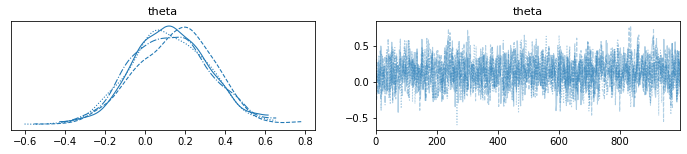

In [3]:
fit = posterior.sample(num_chains=4, num_samples=1000)

df = fit.to_frame()

print(df.describe().T)
print(az.summary(fit))

az.plot_trace(fit, var_names=("theta"))

plt.show()

## Part B

In [4]:
stan_code_b = """
data {
  int<lower=0> n;          // Sample size 
  vector[n] X;             // Data
  real theta_mean;         // Prior mean for theta
  real<lower=0> theta_std; // Prior standard deviation for theta
  real sigma_alpha;
  real sigma_beta;
}
parameters {
  real theta;              // Unknown mean
  real<lower=0> sigma;     // Unknown standard deviation
}
model {
  theta ~ normal(theta_mean, theta_std); // Prior
  sigma ~ gamma(sigma_alpha, sigma_beta); // sigma prior
  X ~ normal(theta, sigma);              // Likelihood
}
"""

stan_data_b = {'n': 20,
            'X': np.array( [-0.02, -0.03, 0.82, -1.05, -0.76, 0.46, -0.06, 0.34, -0.08, -0.24, 1.43, 1.07, -2.5 , 1.48, 2.16, 1.23, -0.21, -0.69, 0.73, -0.62] ),
            'sigma': 1,
            'theta_mean': 0,
            'theta_std': 0.4,
            'sigma_alpha': 2,
            'sigma_beta': 2}

posterior_b = stan.build(stan_code_b, data=stan_data_b, random_seed=0)

Building...



Building: found in cache, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.03 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in '/tmp/httpstan_5zb5l7qt/model_dtrgm2xh.stan', line 16, column 2 to column 41)
  If this warning occurs sporadically, such

                count       mean       std        min        25%        50%  \
parameters                                                                    
lp__           4000.0 -13.743310  1.021086 -25.713472 -14.126892 -13.439826   
accept_stat__  4000.0   0.931085  0.088232   0.265602   0.900900   0.964339   
stepsize__     4000.0   0.772429  0.049652   0.708513   0.733415   0.774090   
treedepth__    4000.0   2.108000  0.661018   1.000000   2.000000   2.000000   
n_leapfrog__   4000.0   4.314000  2.099644   1.000000   3.000000   3.000000   
divergent__    4000.0   0.000000  0.000000   0.000000   0.000000   0.000000   
energy__       4000.0  14.719347  1.420401  12.760268  13.699879  14.401830   
theta          4000.0   0.128766  0.209237  -0.743909  -0.005912   0.132657   
sigma          4000.0   1.086317  0.171006   0.652713   0.968154   1.066504   

                     75%        max  
parameters                           
lp__          -13.026077 -12.746370  
accept_stat__   

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


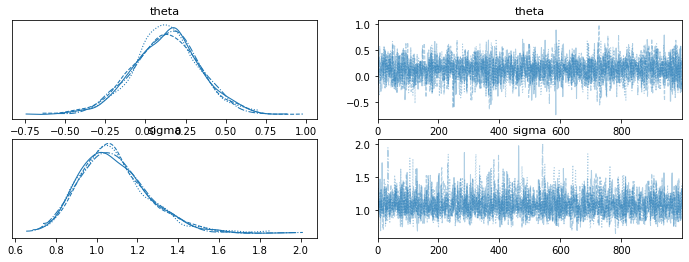

In [5]:
fit_b = posterior_b.sample(num_chains=4, num_samples=1000)

df_b = fit_b.to_frame()

print(df_b.describe().T)
print(az.summary(fit_b))

az.plot_trace(fit_b, var_names=("theta", "sigma"))

plt.show()

# Exercise 4

## Part A

In [6]:
stan_code = """
data {
  int<lower=0> n;            // Sample size 
  vector[n] X;               // Predictors
  vector[n] Y;               // Responses
  real beta_mean;            // beta prior mean
  real<lower=0> beta_std;    // beta prior std
  real<lower=0> sigma_alpha; // sigma prior parameter alpha
  real<lower=0> sigma_beta;  // sigma prior parameter beta
  real epsilon_mean;         // epsilon prior mean
}
parameters {
  real beta0;                // Intercept
  real beta1;                // Coefficient for X
  real<lower=0> sigma;       // Standard deviation
  vector[n] epsilon;
}
model {
  beta0 ~ normal(beta_mean, beta_std);    // Prior for beta0
  beta1 ~ normal(beta_mean, beta_std);    // Prior for beta1
  sigma ~ gamma(sigma_alpha, sigma_beta); // Prior for sigma
  epsilon ~ normal(epsilon_mean, sigma);
  Y ~ normal(epsilon + beta0 + beta1 * X, sigma);   // Likelihood
}
"""

X = np.array( [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0] )
Y = np.array( [1.06, 2.07, 2.97, 4.01, 5.13, 5.92, 6.91, 0.00, 9.15, 9.90] )

stan_data = {'n': 10,
             'X': X,
             'Y': Y,
             'beta_mean': 0,
             'beta_std': 1,
             'epsilon_mean': 0,
             'sigma_alpha': 0.1,
             'sigma_beta': 1 }

posterior = stan.build(stan_code, data=stan_data, random_seed=0)

Building...



Building: found in cache, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 9e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in '/tmp/httpstan_qn94jwye/model_pmqagl3q.stan', line 21, column 2 to column 41)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severe

                count       mean       std        min        25%        50%  \
parameters                                                                    
lp__           4000.0 -23.461082  3.498369 -41.694620 -25.526816 -23.031508   
accept_stat__  4000.0   0.916637  0.110168   0.049554   0.886995   0.957056   
stepsize__     4000.0   0.323362  0.048949   0.283004   0.288320   0.302399   
treedepth__    4000.0   3.601500  0.496749   2.000000   3.000000   4.000000   
n_leapfrog__   4000.0  12.805000  3.874755   3.000000   7.000000  15.000000   
divergent__    4000.0   0.000000  0.000000   0.000000   0.000000   0.000000   
energy__       4000.0  29.953877  4.318431  19.299576  26.941073  29.589896   
beta0          4000.0   0.247544  0.842997  -2.790116  -0.324932   0.243296   
beta1          4000.0   0.787171  0.170706   0.136176   0.671285   0.787438   
sigma          4000.0   1.715364  0.384302   0.819836   1.444527   1.659320   
epsilon.1      4000.0   0.018215  1.282596  -5.63313

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta0       0.248  0.843  -1.383    1.756      0.015    0.012    2981.0   
beta1       0.787  0.171   0.477    1.124      0.003    0.002    2695.0   
sigma       1.715  0.384   1.049    2.393      0.009    0.006    1971.0   
epsilon[0]  0.018  1.283  -2.408    2.383      0.019    0.022    4487.0   
epsilon[1]  0.127  1.271  -2.169    2.519      0.018    0.021    5057.0   
epsilon[2]  0.178  1.320  -2.362    2.671      0.019    0.021    4908.0   
epsilon[3]  0.338  1.272  -1.979    2.825      0.018    0.020    5156.0   
epsilon[4]  0.460  1.308  -1.962    2.967      0.018    0.022    5474.0   
epsilon[5]  0.484  1.260  -1.876    2.902      0.019    0.019    4630.0   
epsilon[6]  0.587  1.318  -1.971    3.023      0.019    0.020    4695.0   
epsilon[7] -3.267  1.352  -5.886   -0.753      0.021    0.016    4266.0   
epsilon[8]  0.887  1.323  -1.776    3.242      0.020    0.018    4218.0   
epsilon[9]  0.894  1.395 

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


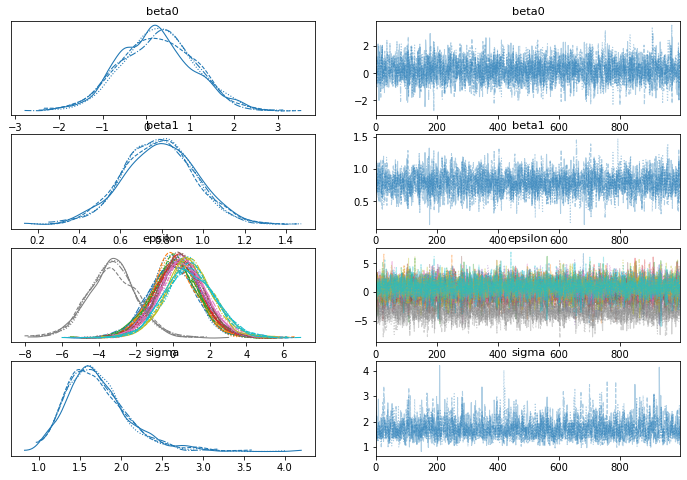

In [7]:
fit = posterior.sample(num_chains=4, num_samples=1000)

df = fit.to_frame()

print(df.describe().T)
print(az.summary(fit))

az.plot_trace(fit, var_names=("beta0", "beta1", "epsilon", "sigma"))

plt.show()

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


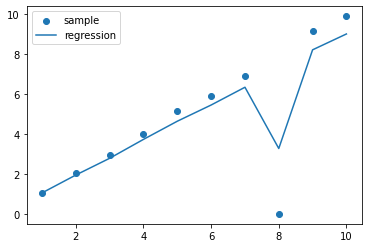

In [8]:
fit_data = az.summary(fit)
beta0 = fit_data['mean']['beta0']
beta1 = fit_data['mean']['beta1']
epsilon = fit_data['mean'].iloc[3:]

plt.scatter(X, Y, label='sample')
plt.plot(X, beta1*X + beta0 + epsilon, label='regression')

plt.legend()

plt.show()

# fit_data['mean'].iloc[3:]

## Part B

In [9]:
stan_code = """
data {
  int<lower=0> n;            // Sample size 
  vector[n] X;               // Predictors
  vector[n] Y;               // Responses
  real beta_mean;            // beta prior mean
  real<lower=0> beta_std;    // beta prior std
  real<lower=0> sigma_alpha; // sigma prior parameter alpha
  real<lower=0> sigma_beta;  // sigma prior parameter beta
  real<lower=0> epsilon_dof; // degrees of freedom for student distribution
  real epsilon_mean;         // epsilon prior mean
}
parameters {
  real beta0;                // Intercept
  real beta1;                // Coefficient for X
  real<lower=0> sigma;       // Standard deviation
  vector[n] epsilon;
}
model {
  beta0 ~ normal(beta_mean, beta_std);    // Prior for beta0
  beta1 ~ normal(beta_mean, beta_std);    // Prior for beta1
  sigma ~ gamma(sigma_alpha, sigma_beta); // Prior for sigma
  epsilon ~ student_t(epsilon_dof, epsilon_mean, sigma);
  Y ~ normal(epsilon + beta0 + beta1 * X, sigma);   // Likelihood
}
"""

stan_data = {'n': 10,
             'X': X,
             'Y': Y,
             'beta_mean': 0,
             'beta_std': 1,
             'sigma_alpha': 0.1,
             'sigma_beta': 1,
             'epsilon_dof': 3,
             'epsilon_mean': 0}

posterior = stan.build(stan_code, data=stan_data, random_seed=0)

Building...



Building: found in cache, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 1.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in '/tmp/httpstan_96e70pms/model_cx6huytd.stan', line 22, column 2 to column 41)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either s

                count       mean       std        min        25%        50%  \
parameters                                                                    
lp__           4000.0 -23.461082  3.498369 -41.694620 -25.526816 -23.031508   
accept_stat__  4000.0   0.916637  0.110168   0.049554   0.886995   0.957056   
stepsize__     4000.0   0.323362  0.048949   0.283004   0.288320   0.302399   
treedepth__    4000.0   3.601500  0.496749   2.000000   3.000000   4.000000   
n_leapfrog__   4000.0  12.805000  3.874755   3.000000   7.000000  15.000000   
divergent__    4000.0   0.000000  0.000000   0.000000   0.000000   0.000000   
energy__       4000.0  29.953877  4.318431  19.299576  26.941073  29.589896   
beta0          4000.0   0.247544  0.842997  -2.790116  -0.324932   0.243296   
beta1          4000.0   0.787171  0.170706   0.136176   0.671285   0.787438   
sigma          4000.0   1.715364  0.384302   0.819836   1.444527   1.659320   
epsilon.1      4000.0   0.018215  1.282596  -5.63313

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta0       0.061  0.116  -0.164    0.276      0.003    0.003    1554.0   
beta1       0.990  0.021   0.948    1.026      0.001    0.000    1540.0   
sigma       0.104  0.054   0.035    0.195      0.002    0.002     487.0   
epsilon[0]  0.006  0.107  -0.188    0.201      0.002    0.002    2613.0   
epsilon[1]  0.017  0.100  -0.168    0.208      0.002    0.002    2792.0   
epsilon[2] -0.034  0.098  -0.224    0.138      0.002    0.002    3282.0   
epsilon[3] -0.005  0.093  -0.176    0.161      0.002    0.002    2990.0   
epsilon[4]  0.070  0.095  -0.104    0.234      0.002    0.002    3175.0   
epsilon[5] -0.043  0.097  -0.234    0.131      0.002    0.002    3311.0   
epsilon[6] -0.045  0.098  -0.230    0.132      0.002    0.002    3329.0   
epsilon[7] -7.970  0.149  -8.279   -7.709      0.003    0.002    2434.0   
epsilon[8]  0.116  0.121  -0.117    0.339      0.002    0.002    2425.0   
epsilon[9] -0.031  0.115 

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


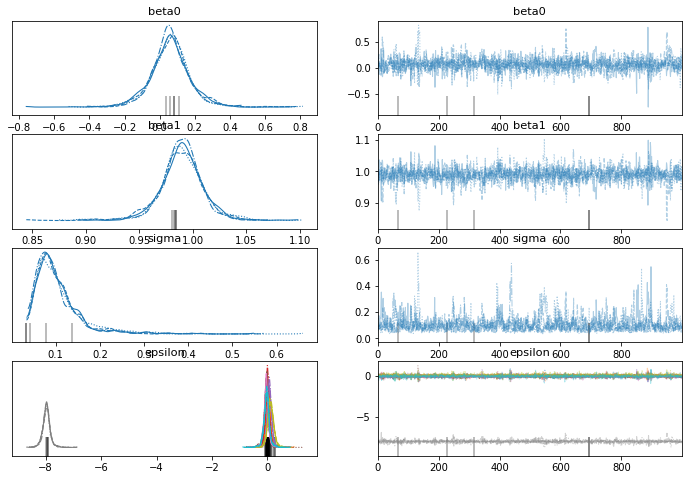

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


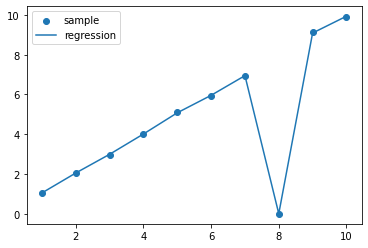

In [10]:
fit = posterior.sample(num_chains=4, num_samples=1000)

print(df.describe().T)
print(az.summary(fit))

az.plot_trace(fit, var_names=("beta0", "beta1", "sigma", "epsilon"))

plt.show()

fit_data = az.summary(fit)
beta0 = fit_data['mean']['beta0']
beta1 = fit_data['mean']['beta1']
epsilon = fit_data['mean'].iloc[3:]

plt.scatter(X, Y, label='sample')
plt.plot(X, beta1*X + beta0 + epsilon, label='regression')

plt.legend()

plt.show()

# fit_data['mean']

# Exercise 5

## Part A

In [15]:
radon_data = pd.read_csv( "https://www.cs.helsinki.fi/u/ahonkela/teaching/stats4ds/data/radon.txt", sep="\t" )
floors = radon_data["floor"].to_numpy()
radon_levels = radon_data["log_radon"].to_numpy()

stan_code = """
data {
  int<lower=0> n;            // Sample size 
  vector[n] X;               // Predictors
  vector[n] Y;               // Responses
  real beta_mean;            // beta prior mean
  real<lower=0> beta_std;    // beta prior std
  real<lower=0> sigma_alpha; // sigma prior parameter alpha
  real<lower=0> sigma_beta;  // sigma prior parameter beta
  real<lower=0> epsilon_dof; // degrees of freedom for student distribution
  real epsilon_mean;         // epsilon prior mean
}
parameters {
  real beta0;                // Intercept
  real beta1;                // Coefficient for X
  real<lower=0> sigma;       // Standard deviation
  vector[n] epsilon;
}
model {
  beta0 ~ normal(beta_mean, beta_std);    // Prior for beta0
  beta1 ~ normal(beta_mean, beta_std);    // Prior for beta1
  sigma ~ gamma(sigma_alpha, sigma_beta); // Prior for sigma
  epsilon ~ student_t(epsilon_dof, epsilon_mean, sigma);
  Y ~ normal(epsilon + beta0 + beta1 * X, sigma);   // Likelihood
}
"""

stan_data = {'n': radon_levels.size,
             'X': floors,
             'Y': radon_levels,
             'beta_mean': 0,
             'beta_std': 1,
             'sigma_alpha': 0.1,
             'sigma_beta': 1,
             'epsilon_dof': 3,
             'epsilon_mean': 0}

posterior_a = stan.build(stan_code, data=stan_data, random_seed=0)

Building...



Building: found in cache, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   0% (3/8000)
Sampling:   0% (4/8000)
Sampling:   1% (103/8000)
Sampling:   3% (202/8000)
Sampling:   5% (401/8000)
Sampling:   6% (500/8000)
Sampling:   9% (700/8000)
Sampling:  11% (900/8000)
Sampling:  12% (1000/8000)
Sampling:  15% (1200/8000)
Sampling:  18% (1400/8000)
Sampling:  19% (1500/8000)
Sampling:  21% (1700/8000)
Sampling:  22% (1800/8000)
Sampling:  25% (2000/8000)
Sampling:  28% (2200/8000)
Sampling:  30% (2400/8000)
Sampling:  32% (2600/8000)
Sampling:  35% (2800/8000)
Sampling:  38% (3000/8000)
Sampling:  40% (3200/8000)
Sampling:  58% (4600/8000)
Sampling:  71% (5700/8000)
Sampling:  86% (6900/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 0.000242 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.42 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current M

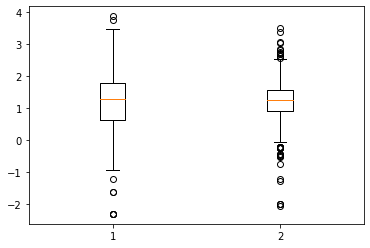

In [16]:
fit_a = posterior_a.sample(num_chains=4, num_samples=1000)

fit_data_a = az.summary(fit_a)

beta0 = fit_data_a['mean']['beta0']
beta1 = fit_data_a['mean']['beta1']
epsilon = fit_data_a['mean'].iloc[3:]

estimation_a = beta1*floors + beta0 + epsilon

data = [radon_levels, estimation_a]

plt.boxplot(data)

plt.show()

# fit_data['mean']

## Part B

In [17]:
radon_data = pd.read_csv( "https://www.cs.helsinki.fi/u/ahonkela/teaching/stats4ds/data/radon.txt", sep="\t" )
floors = radon_data["floor"].to_numpy()
counties = radon_data["county"].to_numpy()
radon_levels = radon_data["log_radon"].to_numpy()

stan_code = """
data {
  int<lower=0> n;            // Sample size 
  int<lower=0> n_c;          // Number of counties
  vector[n] X;               // Predictors
  vector[n] Y;               // Responses
  int counties[n];
  real beta_mean;            // beta prior mean
  real<lower=0> beta_std;    // beta prior std
  real<lower=0> sigma_alpha; // sigma prior parameter alpha
  real<lower=0> sigma_beta;  // sigma prior parameter beta
  real<lower=0> epsilon_dof; // degrees of freedom for student distribution
  real epsilon_mean;         // epsilon prior mean
}
parameters {
  vector[n_c] beta0;         // Intercept
  real beta1;                // Coefficient for X
  real<lower=0> sigma;       // Standard deviation
  vector[n] epsilon;
}
model {

  beta0 ~ normal(beta_mean, beta_std);

  beta1 ~ normal(beta_mean, beta_std);    // Prior for beta1
  sigma ~ gamma(sigma_alpha, sigma_beta); // Prior for sigma
  epsilon ~ student_t(epsilon_dof, epsilon_mean, sigma);
  
  for (i in 1:n){
    Y[i] ~ normal(epsilon[i] + beta0[counties[i]] + beta1 * X[i] , sigma); 
  }
}
"""

stan_data = {'n': radon_levels.size,
             'X': floors,
             'Y': radon_levels,
             'counties': counties,
             'n_c': 85,
             'beta_mean': 0,
             'beta_std': 1,
             'sigma_alpha': 0.1,
             'sigma_beta': 1,
             'epsilon_dof': 3,
             'epsilon_mean': 0}

posterior_b = stan.build(stan_code, data=stan_data, random_seed=0)

Building...



Building: found in cache, done.Messages from stanc:
Warning in '/tmp/httpstan_ux__9rve/model_h7uhdjr7.stan', line 7, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   0% (3/8000)
Sampling:   0% (4/8000)
Sampling:   1% (103/8000)
Sampling:   3% (202/8000)
Sampling:   4% (301/8000)
Sampling:   5% (400/8000)
Sampling:   6% (500/8000)
Sampling:   8% (600/8000)
Sampling:   9% (700/8000)
Sampling:  10% (800/8000)
Sampling:  11% (900/8000)
Sampling:  12% (1000/8000)
Sampling:  14% (1100/8000)
Sampling:  15% (1200/8000)
Sampling:  16% (1300/8000)
Sampling:  18% (1400/8000)
Sampling:  19% (1500/8000)
Sampling:  20% (1600/8000)
Sampling:  21% (1700/8000)
Sampling:  22% (1800/8000)
Sampling:  24% (1900/8000)
Sampling:  25% (2000/8000)
Sampling:  26% (2100/8000)
Sampling:  28% (2200/8000)
Sampling:  29% (2300/8000)
Sampling:  30% (2400/8000)
Sampling:  31% (2500/8000)
Sampling:  32% (2600/8000)
Sampling:  34% (2700/8000)
Sampling:  35% (2800/8000)
Sampling:  36% (2900/8000)
Sampling:  38% (3000/8000)
Sampling:  39% (3100/8000)
Sampling:  40% (3200/8000)
Sampling:  41% (3300/8000)
Samplin

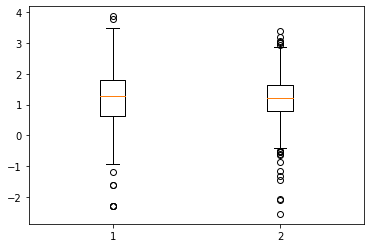

In [18]:
fit_b = posterior_b.sample(num_chains=4, num_samples=1000)

# az.plot_trace(fit, var_names=("beta0", "beta1", "sigma", "epsilon"))

# plt.show()

fit_data_b = az.summary(fit_b)

fit_data_b

beta0 = fit_data_b['mean'].iloc[:85]
beta1 = fit_data_b['mean']['beta1']
epsilon = fit_data_b['mean'].iloc[86:]

estimation_b = np.zeros(radon_levels.size)

for i in range(radon_levels.size):
    estimation_b[i] = epsilon[i] + beta0[counties[i]-1] + beta1*floors[i]

data = [radon_levels, estimation_b]

plt.boxplot(data)

plt.show()

# fit_data['mean']

## Part C

In [19]:
radon_data = pd.read_csv( "https://www.cs.helsinki.fi/u/ahonkela/teaching/stats4ds/data/radon.txt", sep="\t" )
floors = radon_data["floor"].to_numpy()
counties = radon_data["county"].to_numpy()
radon_levels = radon_data["log_radon"].to_numpy()

stan_code = """
data {
  int<lower=0> n;            // Sample size 
  int<lower=0> n_c;          // Number of counties
  vector[n] X;               // Predictors
  vector[n] Y;               // Responses
  int counties[n];
  real beta_mean;            // beta prior mean
  real<lower=0> beta_std;    // beta prior std
  real<lower=0> sigma_alpha; // sigma prior parameter alpha
  real<lower=0> sigma_beta;  // sigma prior parameter beta
  real<lower=0> epsilon_dof; // degrees of freedom for student distribution
  real epsilon_mean;         // epsilon prior mean
}
parameters {
  vector[n_c] beta0;         // Intercept
  real beta1;                // Coefficient for X
  real<lower=0> sigma;       // Standard deviation
  vector[n] epsilon;
  real beta0_mu;
  real<lower=0> beta0_sigma;
}
model {

  beta0 ~ normal(beta0_mu, beta0_sigma);

  beta1 ~ normal(beta_mean, beta_std);    // Prior for beta1
  sigma ~ gamma(sigma_alpha, sigma_beta); // Prior for sigma
  epsilon ~ student_t(epsilon_dof, epsilon_mean, sigma);
  
  for (i in 1:n){
    Y[i] ~ normal(epsilon[i] + beta0[counties[i]] + beta1 * X[i] , sigma); 
  }
}
"""

stan_data = {'n': radon_levels.size,
             'X': floors,
             'Y': radon_levels,
             'counties': counties,
             'n_c': 85,
             'beta_mean': 0,
             'beta_std': 1,
             'sigma_alpha': 0.1,
             'sigma_beta': 1,
             'epsilon_dof': 3,
             'epsilon_mean': 0}

posterior_c = stan.build(stan_code, data=stan_data, random_seed=0)

Building...



Building: found in cache, done.Messages from stanc:
Warning in '/tmp/httpstan_slsrpdzv/model_fbzdubro.stan', line 7, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    is provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   0% (3/8000)
Sampling:   0% (4/8000)
Sampling:   1% (103/8000)
Sampling:   3% (202/8000)
Sampling:   4% (301/8000)
Sampling:   5% (400/8000)
Sampling:   6% (500/8000)
Sampling:   8% (600/8000)
Sampling:   9% (700/8000)
Sampling:  10% (800/8000)
Sampling:  11% (900/8000)
Sampling:  12% (1000/8000)
Sampling:  14% (1100/8000)
Sampling:  15% (1200/8000)
Sampling:  16% (1300/8000)
Sampling:  18% (1400/8000)
Sampling:  19% (1500/8000)
Sampling:  20% (1600/8000)
Sampling:  21% (1700/8000)
Sampling:  22% (1800/8000)
Sampling:  24% (1900/8000)
Sampling:  25% (2000/8000)
Sampling:  26% (2100/8000)
Sampling:  28% (2200/8000)
Sampling:  29% (2300/8000)
Sampling:  30% (2400/8000)
Sampling:  31% (2500/8000)
Sampling:  32% (2600/8000)
Sampling:  34% (2700/8000)
Sampling:  35% (2800/8000)
Sampling:  36% (2900/8000)
Sampling:  38% (3000/8000)
Sampling:  39% (3100/8000)
Sampling:  41% (3300/8000)
Sampling:  42% (3400/8000)
Samplin

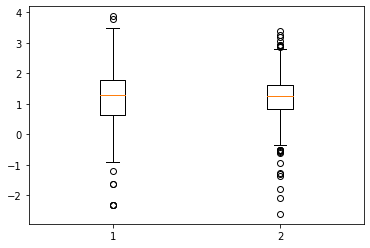

In [20]:
fit_c = posterior_c.sample(num_chains=4, num_samples=1000)

# az.plot_trace(fit, var_names=("beta0", "beta1", "sigma", "epsilon"))

# plt.show()

fit_data_c = az.summary(fit_c)

fit_data_c

beta0 = fit_data_c['mean'].iloc[:85]
beta1 = fit_data_c['mean']['beta1']
epsilon = fit_data_c['mean'].iloc[86:]

estimation_c = np.zeros(radon_levels.size)

for i in range(radon_levels.size):
    estimation_c[i] = epsilon[i] + beta0[counties[i]-1] + beta1*floors[i]

data = [radon_levels, estimation_c]

plt.boxplot(data)

plt.show()

# fit_data['mean']

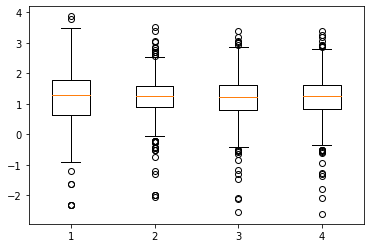

In [21]:
data = [radon_levels, estimation_a, estimation_b, estimation_c]
plt.boxplot(data)
plt.show()